In [5]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import maup

In [6]:
elects = pd.read_csv("../data/TX_statewide_18_Dem_Runofff.csv").drop(columns=["Unnamed: 0"])
# tx_prec_shapes = gpd.read_file("https://people.csail.mit.edu/ddeford/TX_vtds.zip")
tx_prec_shapes = gpd.read_file("../data/TX_VTDs_cvap/TX_VTDs_cvap.shp")

In [7]:
dallas_county_pcts = pd.merge(left=tx_prec_shapes, right=elects, on="CNTYVTD").query("CNTY == 113")

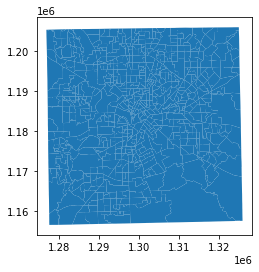

In [8]:
dallas_county_pcts.plot()

In [9]:
dallas_county_pcts.head()

,CNTY,COLOR,VTD,CNTYVTD,VTDKEY,Shape_area,Shape_len,CVAP,WCVAP,BCVAP,...,geometry,18R_Governor_D_tot,ValdezD_18R_Governor_pct,WhiteD_18R_Governor_pct,WVAP_pct,HVAP_pct,BVAP_pct,non_WVAP_pct,non_HVAP_pct,non_BVAP_pct
1926,113,7,1000,1131000,1927,6.761341e+05,4118.312652,1467.683316,441.057386,689.086079,...,"POLYGON ((1303718.868 1191545.443, 1303685.403...",12,0.916667,0.083333,0.149285,0.467443,0.339333,0.850715,0.532557,0.660667
1927,113,2,1001,1131001,1928,5.855244e+05,4530.621487,1225.000000,475.000000,495.000000,...,"POLYGON ((1303589.778 1192270.453, 1303608.571...",18,1.000000,0.000000,0.200523,0.478772,0.259961,0.799477,0.521228,0.740039
1928,113,7,1002,1131002,1929,3.210395e+05,2521.697962,1364.293882,442.192682,539.931389,...,"POLYGON ((1302589.410 1193048.443, 1302598.878...",28,0.785714,0.214286,0.157772,0.542141,0.259259,0.842228,0.457859,0.740741
1929,113,1,1003,1131003,1930,3.262490e+06,7187.951829,4815.927730,1164.579781,3060.552172,...,"POLYGON ((1302693.000 1198885.805, 1302719.110...",260,0.834615,0.165385,0.179959,0.139315,0.600971,0.820041,0.860685,0.399029
1930,113,2,1004,1131004,1931,1.525565e+06,5090.396582,1695.000000,1000.000000,500.000000,...,"POLYGON ((1304625.262 1196589.099, 1304624.777...",99,0.363636,0.636364,0.603944,0.122817,0.219155,0.396056,0.877183,0.780845


In [6]:
dallas_county_pcts.crs

<Projected CRS: EPSG:3081>
Name: NAD83 / Texas State Mapping System
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: USA - Texas
- bounds: (-106.66, 25.83, -93.5, 36.5)
Coordinate Operation:
- name: Texas State Mapping System (meters)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [7]:
dallas_county_pcts.columns

Index(['CNTY', 'COLOR', 'VTD', 'CNTYVTD', 'VTDKEY', 'Shape_area', 'Shape_len',
       'CVAP', 'WCVAP', 'BCVAP', 'AMINCVAP', 'ASIANCVAP', 'NHPICVAP', 'HCVAP',
       'TOTPOP', 'hcvap_pct', 'bcvap_pct', 'geometry', '18R_Governor_D_tot',
       'ValdezD_18R_Governor_pct', 'WhiteD_18R_Governor_pct', 'WVAP_pct',
       'HVAP_pct', 'BVAP_pct', 'non_WVAP_pct', 'non_HVAP_pct', 'non_BVAP_pct'],
      dtype='object')

In [15]:
to_rename = {'NH_WHITEPOP': "NH_WHITE", 
             "NH_BLACKPOP":"NH_BLACK", 
             "NH_AMINPOP":"NH_AMIN",
             "NH_ASIANPOP": "NH_ASIAN", 
             "NH_HAWAIIANPOP": "NH_NHPI",
             "NH_OTHERPOP": "NH_OTHER*",
             "NH_WVAP": "WVAP", 
             "NH_BVAP": "BVAP", 
             "NH_AMINVAP": "AMINVAP", 
             "NH_ASIANVAP": "ASIANVAP", 
             "NH_HAWAIIANVAP": "NHPIVAP",
             'NH_OTHERVAP': "OTHERVAP*"}
reconstructed_dallas_blocks = pd.read_csv("../dallas_broken_down.csv").rename(columns=to_rename)

In [36]:
dallas_county_blocks = gpd.read_file("../../data/dallas_county_blocks/dallas_county_blocks10.shp")

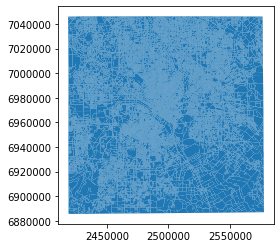

In [39]:
dallas_county_blocks.plot()

In [46]:
dallas_county_pcts = dallas_county_pcts.to_crs(dallas_county_blocks.crs)

In [58]:
dallas_county_pcts = dallas_county_pcts.set_index("CNTYVTD")

In [50]:
dallas_county_blocks = dallas_county_blocks.set_index("GEOID10")

In [59]:
assign = maup.assign(dallas_county_blocks, dallas_county_pcts)

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/smaug/anaconda3/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a

In [ ]:
# assign.to_csv("dallas_pcts/block_prec_assign.csv")

In [19]:
assign = pd.read_csv("dallas_pcts/block_prec_assign.csv").set_index('GEOID10')

In [25]:
reconstructed_dallas_blocks["geoid"] = ("48113" + reconstructed_dallas_blocks.tract.apply(lambda t: '{:.2f}'.format(t)).str.replace(".", "").str.pad(width=6, fillchar='0') + reconstructed_dallas.block.astype(str).str.pad(width=4, fillchar='0')).astype(int)

In [27]:
reconstructed_dallas_blocks.set_index('geoid', inplace=True)

In [28]:
reconstructed_dallas_blocks["CNTYVTD"] = assign

In [29]:
reconstructed_dallas_blocks.head()

,state,county,tract,bg,block,HISP,male,female,VAP,HVAP,...,NH_NHPI,NH_OTHER*,WVAP,BVAP,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP*,TOTPOP,CNTYVTD
geoid,,,,,,,,,,,,,,,,,,,,,
481130001001001,48,113,1.0,1,1001,0,3.0,2.0,5.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5,1132072
481130001001004,48,113,1.0,1,1004,4,52.0,47.0,86.0,4.0,...,0.0,0.0,82.0,0.0,0.0,0.0,0.0,0.0,99,1132072
481130001001006,48,113,1.0,1,1006,153,153.0,145.0,220.0,99.0,...,1.0,14.0,77.0,21.0,0.0,13.0,1.0,9.0,298,1132072
481130001001007,48,113,1.0,1,1007,46,46.0,52.0,88.0,39.0,...,0.0,0.0,26.0,20.0,0.0,3.0,0.0,0.0,98,1132072
481130001001008,48,113,1.0,1,1008,0,12.0,24.0,36.0,0.0,...,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,36,1132072


In [35]:
reconstructed_dallas_pcts = reconstructed_dallas_blocks.groupby("CNTYVTD").sum()[col_names].reset_index()

In [41]:
reconstructed_dallas_pcts["HVAP_pct"] = reconstructed_dallas_pcts["HVAP"] / reconstructed_dallas_pcts["VAP"]
reconstructed_dallas_pcts["BVAP_pct"] = reconstructed_dallas_pcts["BVAP"] / reconstructed_dallas_pcts["VAP"]
reconstructed_dallas_pcts["WVAP_pct"] = reconstructed_dallas_pcts["WVAP"] / reconstructed_dallas_pcts["VAP"]

In [42]:
reconstructed_dallas_pcts.head()

,CNTYVTD,TOTPOP,HISP,NH_WHITE,NH_BLACK,NH_AMIN,NH_ASIAN,NH_NHPI,NH_OTHER*,VAP,HVAP,WVAP,BVAP,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP*,HVAP_pct,BVAP_pct,WVAP_pct
0,1131000,2740,1604,447.0,534.0,7.0,53.0,1.0,94.0,2012.0,1090.0,412.0,417.0,7.0,43.0,1.0,42.0,0.541750,0.207256,0.204771
1,1131001,2022,1378,287.0,297.0,19.0,38.0,0.0,3.0,1486.0,984.0,266.0,188.0,12.0,34.0,0.0,2.0,0.662180,0.126514,0.179004
2,1131002,4872,3241,896.0,596.0,5.0,100.0,2.0,32.0,3488.0,2215.0,741.0,433.0,4.0,64.0,2.0,29.0,0.635034,0.124140,0.212443
3,1131003,5037,1388,663.0,2757.0,9.0,160.0,1.0,59.0,4073.0,1013.0,549.0,2329.0,9.0,135.0,1.0,37.0,0.248711,0.571814,0.134790
4,1131004,2022,547,1185.0,209.0,6.0,62.0,0.0,13.0,1650.0,368.0,1037.0,177.0,5.0,53.0,0.0,10.0,0.223030,0.107273,0.628485


In [43]:
reconstructed_dallas_pcts.to_csv("dallas_pcts/reconstructed_dallas_precicnts.csv")

In [20]:
# assign = assign.set_index('GEOID10')

In [7]:
col_names = ['TOTPOP', 'HISP', 'NH_WHITE', 'NH_BLACK', 'NH_AMIN', 
             'NH_ASIAN', 'NH_NHPI', 'NH_OTHER', 'NH_2MORE',
             'VAP', 'HVAP', 'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP', 
             'NHPIVAP', 'OTHERVAP', '2MOREVAP']
epsilon_values = [0.25, 0.5, 1, 2]
epsilon_splits = ["equal", "top_heavy", "mid_heavy", "bottom_heavy"]

In [164]:
dallas_pcts = pd.DataFrame()
for eps in epsilon_values:
    for split in epsilon_splits:
        print(eps, split)
        df = pd.read_csv("results/noised_runs_{}_{}.csv".format(eps, split))
        df_test = df.pivot_table(index=["GEOID","epsilon","split","run"]).unstack()
        df_test.columns = ["{}_{}_noise".format(t[1], t[0]) for t in df_test.columns]
        df_test = df_test.reset_index().set_index("GEOID")
        df_test["CNTYVTD"] = assign
        df_prec = df_test.groupby("CNTYVTD").agg({**{col: "sum" for col in df_test.columns if 'noise' in col}, 
                                **{"epsilon": "first", "split": "first"}})
        dallas_pcts = dallas_pcts.append(df_prec.reset_index())

0.25 equal
0.25 top_heavy
0.25 mid_heavy
0.25 bottom_heavy
0.5 equal
0.5 top_heavy
0.5 mid_heavy
0.5 bottom_heavy
1 equal
1 top_heavy
1 mid_heavy
1 bottom_heavy
2 equal
2 top_heavy
2 mid_heavy
2 bottom_heavy


In [171]:
dallas_pcts.to_csv("toydown_dallas_county_prec_runs.csv", index=False)

In [21]:
dallas_pcts = pd.DataFrame()
for eps in epsilon_values:
    for split in epsilon_splits:
        print(eps, split)
        df = pd.read_csv("results/noised_runs_allow_neg_{}_{}.csv".format(eps, split))
        df_test = df.pivot_table(index=["GEOID","epsilon","split","run"]).unstack()
        df_test.columns = ["{}_{}_noise".format(t[1], t[0]) for t in df_test.columns]
        df_test = df_test.reset_index().set_index("GEOID")
        df_test["CNTYVTD"] = assign
        df_prec = df_test.groupby("CNTYVTD").agg({**{col: "sum" for col in df_test.columns if 'noise' in col}, 
                                **{"epsilon": "first", "split": "first"}})
        dallas_pcts = dallas_pcts.append(df_prec.reset_index())

0.25 equal
0.25 top_heavy
0.25 mid_heavy
0.25 bottom_heavy
0.5 equal
0.5 top_heavy
0.5 mid_heavy
0.5 bottom_heavy
1 equal
1 top_heavy
1 mid_heavy
1 bottom_heavy
2 equal
2 top_heavy
2 mid_heavy
2 bottom_heavy


In [22]:
dallas_pcts.to_csv("toydown_allow_neg_dallas_county_prec_runs.csv", index=False)

In [17]:
col_names = ['TOTPOP', 'HISP', 'NH_WHITE', 'NH_BLACK', 'NH_AMIN', 
             'NH_ASIAN', 'NH_NHPI', 'NH_OTHER*',
             'VAP', 'HVAP', 'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP', 
             'NHPIVAP', 'OTHERVAP*']

In [14]:
for neg in ["allow_neg", "non_neg"]:
    dallas_pcts_recon = pd.DataFrame()
    for eps in epsilon_values:
        for split in epsilon_splits:
            print(eps, split)
            df = pd.read_csv("results/noised_recon_runs_{}_{}_{}.csv".format(neg, eps, split))
            df_test = df.pivot_table(index=["GEOID","epsilon","split","run"]).unstack()
            df_test.columns = ["{}_{}_noise".format(t[1], t[0]) for t in df_test.columns]
            df_test = df_test.reset_index().set_index("GEOID")
            df_test["CNTYVTD"] = assign
            df_prec = df_test.groupby("CNTYVTD").agg({**{col: "sum" for col in df_test.columns if 'noise' in col}, 
                                    **{"epsilon": "first", "split": "first"}})
            dallas_pcts_recon = dallas_pcts_recon.append(df_prec.reset_index())
    dallas_pcts_recon.to_csv("dallas_pcts/toydown_recon_{}_dallas_county_prec_runs.csv".format(neg), index=False)

0.25 equal
0.25 top_heavy
0.25 mid_heavy
0.25 bottom_heavy
0.5 equal
0.5 top_heavy
0.5 mid_heavy
0.5 bottom_heavy
1 equal
1 top_heavy
1 mid_heavy
1 bottom_heavy
2 equal
2 top_heavy
2 mid_heavy
2 bottom_heavy
0.25 equal
0.25 top_heavy
0.25 mid_heavy
0.25 bottom_heavy
0.5 equal
0.5 top_heavy
0.5 mid_heavy
0.5 bottom_heavy
1 equal
1 top_heavy
1 mid_heavy
1 bottom_heavy
2 equal
2 top_heavy
2 mid_heavy
2 bottom_heavy


In [23]:
dallas_pcts

,CNTYVTD,0_2MOREVAP_noise,1_2MOREVAP_noise,2_2MOREVAP_noise,3_2MOREVAP_noise,4_2MOREVAP_noise,5_2MOREVAP_noise,6_2MOREVAP_noise,7_2MOREVAP_noise,8_2MOREVAP_noise,...,24_WVAP_noise,25_WVAP_noise,26_WVAP_noise,27_WVAP_noise,28_WVAP_noise,29_WVAP_noise,30_WVAP_noise,31_WVAP_noise,epsilon,split
0,1131000,-46.704391,76.748633,112.713016,20.175274,14.092301,3.670262,-50.897655,43.281492,139.676969,...,174.375094,284.629902,396.221832,216.343163,221.599883,280.265816,212.552929,266.663274,0.25,equal
1,1131001,-19.374906,19.291048,55.353376,2.457356,-32.930563,20.802434,48.339013,-29.829806,36.426294,...,326.844989,295.979384,282.266202,325.413130,327.309262,346.855464,302.129919,313.464804,0.25,equal
2,1131002,51.732462,7.741017,1.412525,35.449069,-61.755740,41.088128,40.449991,58.786695,56.879633,...,560.957898,599.944944,521.606527,601.891365,545.578043,541.097349,467.857284,560.695228,0.25,equal
3,1131003,132.067585,15.273530,62.177935,27.393941,95.759881,77.192752,155.075600,72.321923,-22.025617,...,704.917181,678.801329,749.776647,636.635544,630.020084,650.516238,528.008831,808.049794,0.25,equal
4,1131004,49.142757,13.097605,0.088016,33.727357,78.732947,24.048769,35.444389,99.782089,-20.287138,...,1065.530342,1070.868426,1099.506730,1058.127246,1033.617869,1041.701453,1162.133262,1134.059849,0.25,equal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,1134660,1.879500,1.311656,0.043612,0.478648,0.127257,0.337697,0.551521,-1.769441,0.672557,...,21.895290,20.367048,19.771202,19.299968,20.689098,19.107798,21.948439,21.632545,2.00,bottom_heavy
823,1134661,12.010092,18.742741,8.536565,17.712501,8.802138,12.251249,12.502200,8.155765,4.640482,...,298.470930,297.048204,304.265620,301.909169,302.184770,300.233807,307.720653,305.408498,2.00,bottom_heavy
824,1134662,-4.021099,4.733480,-2.285239,2.981782,4.806561,-8.480148,-5.075633,3.696848,-4.554917,...,153.214082,137.928507,157.379926,154.388821,144.597232,138.438345,150.496505,142.771734,2.00,bottom_heavy
825,1134663,4.735959,-3.229880,5.757241,8.456757,-13.062924,2.668371,-3.862621,8.015513,-1.034814,...,-5.152535,-1.069778,6.687865,-5.671389,-2.770481,8.232547,1.715060,-3.376672,2.00,bottom_heavy


In [170]:
dallas_county_pcts = dallas_county_pcts.reset_index()

In [172]:
dallas_pcts.shape

(13232, 579)

In [173]:
dallas_county_pcts.shape

(827, 27)

In [178]:
dc_pcts = pd.merge(left=dallas_county_pcts, right=dallas_pcts, on="CNTYVTD", how="left")

In [185]:
dc_pcts.to_file("dallas_pcts/dallas_county_precincts_toydown_noise.shp")

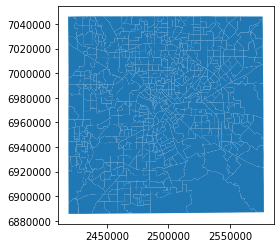

In [184]:
dc_pcts.query("epsilon == 1 & split == 'top_heavy'").plot()

### Scratch

In [24]:
df = pd.read_csv("results/noised_runs_1_top_heavy.csv")

In [29]:
df_test = df.pivot_table(index=["GEOID","epsilon","split","run"])
# df_test.columns = ["{}_{}_noise".format(t[1], t[0]) for t in df_test.columns]

In [31]:
df_test = df_test.reset_index().set_index("GEOID")

In [33]:
df_test["CNTYVTD"] = assign

In [39]:
df_test.groupby("CNTYVTD").agg({**{col: "sum" for col in col_names}, 
                                **{"epsilon": "first", "split": "first", "run": "first"}})

,TOTPOP,HISP,NH_WHITE,NH_BLACK,NH_AMIN,NH_ASIAN,NH_NHPI,NH_OTHER,NH_2MORE,VAP,...,WVAP,BVAP,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP,epsilon,split,run
CNTYVTD,,,,,,,,,,,,,,,,,,,,,
1131000,89690.951355,47337.510288,10237.840722,28508.607566,401.784537,1.309491e+03,1.622213e+01,775.674315,1103.820987,60390.045505,...,9249.244192,20577.612193,316.798686,9.034564e+02,1.527469e+01,508.115608,6.946297e+02,1,top_heavy,0
1131001,63737.079706,34161.087044,10444.397488,15789.232980,444.487782,2.299071e+03,8.928640e+00,107.078876,482.796102,48546.586278,...,9710.277475,12577.187476,420.342472,2.079445e+03,7.683546e+00,82.723468,2.930307e+02,1,top_heavy,0
1131002,160163.892550,96901.342847,19533.981050,37894.912444,277.464093,4.313009e+03,3.897303e+01,337.902732,866.307334,110035.467229,...,17530.078564,28585.357884,230.225896,3.319667e+03,1.470985e+01,144.139766,6.223958e+02,1,top_heavy,0
1131003,161221.071719,26551.346349,24936.604019,97651.023832,506.165762,8.112313e+03,2.584107e+01,555.664981,2882.112584,125634.187782,...,22520.751419,75420.169199,434.180410,7.543350e+03,2.584107e+01,377.667884,1.805151e+03,1,top_heavy,0
1131004,74393.495634,10562.523016,43702.660360,16075.337487,267.338665,2.530004e+03,1.780854e+01,174.700987,1063.122932,57096.028555,...,34500.710393,12601.940848,232.575391,2.117337e+03,1.780854e+01,100.748303,6.947612e+02,1,top_heavy,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134660,2507.022535,1709.214944,723.014991,62.015836,6.003471,6.508397e-07,3.004061e-10,6.182144,0.591149,1964.776523,...,629.181137,22.119754,5.433545,6.502897e-07,3.003546e-10,1.246817,4.018064e-10,1,top_heavy,0
1134661,107303.422124,90321.262678,11112.652808,3120.640499,222.393897,1.860891e+03,2.284930e+01,68.607380,574.124363,69771.137703,...,9413.974734,2081.534453,174.198264,1.496653e+03,2.284930e+01,40.337085,2.905324e+02,1,top_heavy,0
1134662,24796.455370,18710.957603,5179.210730,355.450594,49.644217,3.905107e+02,2.673295e+00,21.481729,86.526492,17123.363042,...,4229.552096,286.787244,36.289365,3.299766e+02,2.096112e+00,13.819189,4.872409e+01,1,top_heavy,0


In [34]:
df_test

,epsilon,split,run,2MOREVAP,AMINVAP,ASIANVAP,BVAP,HISP,HVAP,NHPIVAP,...,NH_ASIAN,NH_BLACK,NH_NHPI,NH_OTHER,NH_WHITE,OTHERVAP,TOTPOP,VAP,WVAP,CNTYVTD
GEOID,,,,,,,,,,,,,,,,,,,,,
481130001001000,1,top_heavy,0,7.991880e-11,0.000000e+00,2.436545e-11,3.009455e-11,2.831368e-10,7.036513e-12,0.000000e+00,...,2.436689e-11,5.392577e-11,0.000000e+00,0.000000e+00,2.686935e-11,0.000000e+00,4.966732e-10,1.560683e-10,1.465298e-11,1132072
481130001001000,1,top_heavy,1,2.115990e-11,6.638407e-13,2.213534e-12,1.644179e-12,6.403229e+00,9.376781e-13,0.000000e+00,...,2.213755e-12,1.644387e-12,0.000000e+00,0.000000e+00,4.325449e-12,0.000000e+00,1.323139e+01,2.921765e-11,2.598519e-12,1132072
481130001001000,1,top_heavy,2,3.096343e-12,6.781054e-12,0.000000e+00,6.677290e-11,1.209418e-11,4.346598e-12,5.293978e-12,...,2.710957e-12,2.007157e+01,5.294847e-12,0.000000e+00,1.465963e+00,0.000000e+00,2.153754e+01,1.125543e-10,2.626344e-11,1132072
481130001001000,1,top_heavy,3,0.000000e+00,3.830820e-12,8.488686e-12,1.335302e-12,7.507863e-11,7.456170e-11,2.274951e-13,...,8.488692e-12,6.764275e-12,2.276152e-13,0.000000e+00,7.139234e-12,0.000000e+00,1.020900e-10,9.376034e-11,5.316364e-12,1132072
481130001001000,1,top_heavy,4,1.489757e-11,1.759127e-12,5.401196e-13,1.928104e+00,8.916194e-13,2.614928e-13,0.000000e+00,...,1.301575e-12,1.928104e+00,0.000000e+00,0.000000e+00,6.698581e+00,0.000000e+00,8.626685e+00,8.626685e+00,6.698581e+00,1132072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481139801001046,1,top_heavy,27,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.155882e-11,1.155268e-11,0.000000e+00,...,7.933836e-12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.949243e-11,1.155268e-11,0.000000e+00,1134119
481139801001046,1,top_heavy,28,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,6.023772e-12,0.000000e+00,0.000000e+00,3.746460e-12,0.000000e+00,9.769787e-12,1.864551e-12,1.864551e-12,1134119
481139801001046,1,top_heavy,29,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.371492e-12,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,2.392806e-12,0.000000e+00,2.389010e-12,7.764053e-12,2.389010e-12,0.000000e+00,1134119
